# Summary

In here we're going to extract as many features as possible for each signal

In [1]:
from notebook_utilities import *


import_data_science(globals())

root = os.path.join("/", "mnt", "e")
artifacts_path = os.path.join(root, "artifacts")

raw = pd.read_parquet(os.path.join(artifacts_path, 'signals_10s_1750tracks.parquet'))


# assigning feature
signals = raw['y']

# udf register
one_hot_encoding = np.vectorize(data_transformation.one_hot_function)


labels = raw['genre']

# label assigning
labels = one_hot_encoding(labels)
labels.shape

(1742,)

In [2]:
def extract_f32_from_str(row) -> np.array:
    row     = row[1:-1].split(',')
    casted  = np.array(row, dtype=np.float32)

    return casted


In [3]:
samples = signals.apply(extract_f32_from_str)


sample = extract_f32_from_str(signals.iloc[0])

del signals


sample1 = sample[:22050]
sample2 = sample[22050:44100]

In [4]:
sample2.shape, sample1.shape, samples.shape, samples.iloc[0].shape

((22050,), (22050,), (1742,), (220500,))

In [5]:
import librosa

import matplotlib.pyplot as plt

import IPython.display as ipd

In [6]:
ipd.Audio(data=sample1, rate=22050)

# Plain signal
X - time,
Y - amplitude 

> amplitude, in physics, the maximum displacement or distance moved by a point on a vibrating body or wave measured from its equilibrium position.

In [ ]:
plt.plot(sample1)
plt.title('signal')
plt.xlabel('Time (sample)')
plt.ylabel('Amplitude')

print(f"""
      sample1.shape: {sample1.shape}
      """)

# Fourier Transform

34


Text(0, 0.5, 'Amplituda')

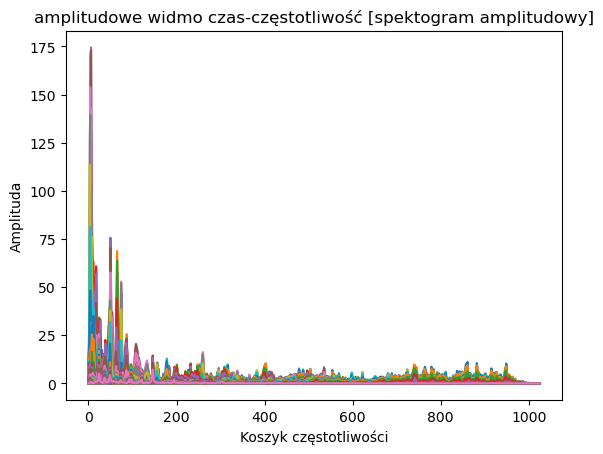

In [8]:

# podajemy moduł STFT do funkcji abs
ft = np.abs(librosa.stft(sample1, hop_length=256))

print(22050%256)

plt.plot(ft)
plt.title('amplitudowe widmo czas-częstotliwość [spektogram amplitudowy]')
plt.xlabel('Koszyk częstotliwości')
plt.ylabel('Amplituda')

In [9]:
print(f"""
      sample1.shape: {sample1.shape}
      stft.shape: {ft.shape}
      """)


      sample1.shape: (22050,)
      stft.shape: (1025, 87)
      


# Spectogram


((1025, 87),
 43,
 array([-80.      , -72.219284, -64.6293  , -61.263275, -62.884655,
        -80.      , -61.074516, -57.046318, -57.882294, -63.73778 ,
        -80.      , -75.76581 , -67.90051 , -62.02352 , -57.637997,
        -54.028065, -51.69289 , -50.534325, -49.90914 , -51.774185,
        -63.142143, -55.162197, -49.080757, -62.564087, -44.611446,
        -39.401913, -29.956686, -30.999702, -65.079315, -30.22808 ,
        -26.91691 , -30.147045, -52.474293, -52.4149  , -39.46586 ,
        -36.380577, -48.321583, -38.63089 , -32.963123, -35.591488,
        -47.543896, -34.63698 , -29.642439, -28.668743, -37.23089 ,
        -29.062038, -26.083302, -25.869106, -30.876415, -47.000584,
        -34.388004, -30.847584, -23.720257, -24.531128, -27.671225,
        -41.157257, -31.226267, -27.38861 , -31.557714, -39.788013,
        -28.404442, -28.323093, -36.247475, -41.99871 , -35.71057 ,
        -37.692375, -43.513172, -46.715374, -56.037476, -53.040096,
        -54.970936, -62.373795

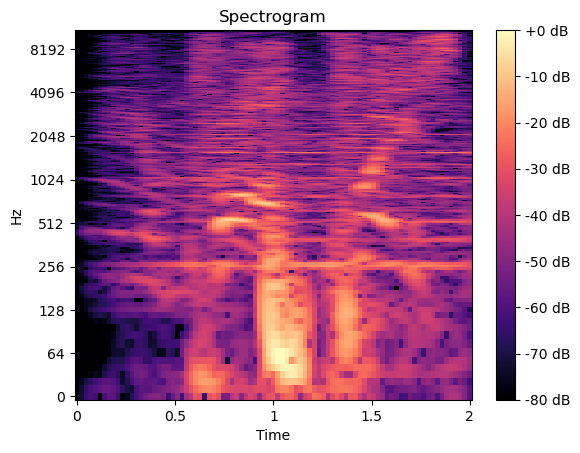

In [10]:
spec = librosa.amplitude_to_db(np.abs(librosa.stft(sample1, hop_length=256)), ref=np.max)

librosa.display.specshow(spec, sr=22050, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')

spec.shape, 22050 // 512, spec[0]

In [11]:
print(f"""
      sample1.shape: {sample1.shape}
      stft.shape: {ft.shape}
      spec.shape: {spec.shape}
      """)


      sample1.shape: (22050,)
      stft.shape: (1025, 87)
      spec.shape: (1025, 87)
      


# Mel Spectogram


Mel Spectrogram is a spectrogram where the frequencies are converted to the mel scale.

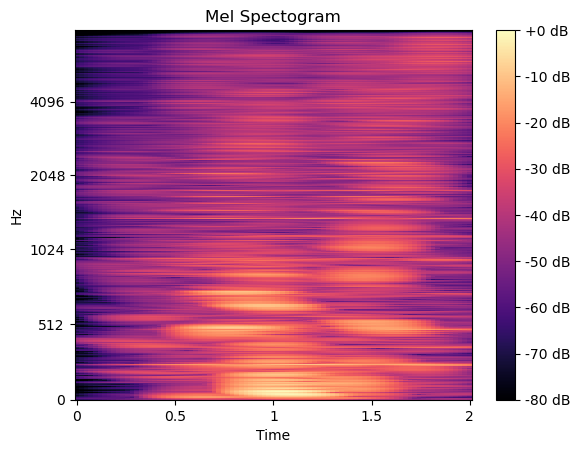

In [12]:
mel_spect = librosa.feature.melspectrogram(y=sample1, sr=22050, n_fft=8192, hop_length=256, n_mels=1025)
mel_spect = librosa.power_to_db(mel_spect, ref=np.max)

librosa.display.specshow(mel_spect, y_axis='mel', fmax=8000, x_axis='time')
plt.title('Mel Spectogram')
plt.colorbar(format='%+2.0f dB')

In [13]:
print(f"""
    sample1.shape:      {sample1.shape}
    stft.shape:         {ft.shape}
    spec.shape:         {spec.shape}
    mel_spec.shape:     {mel_spect.shape}
      """)


    sample1.shape:      (22050,)
    stft.shape:         (1025, 87)
    spec.shape:         (1025, 87)
    mel_spec.shape:     (1025, 87)
      


# Power Spectogram

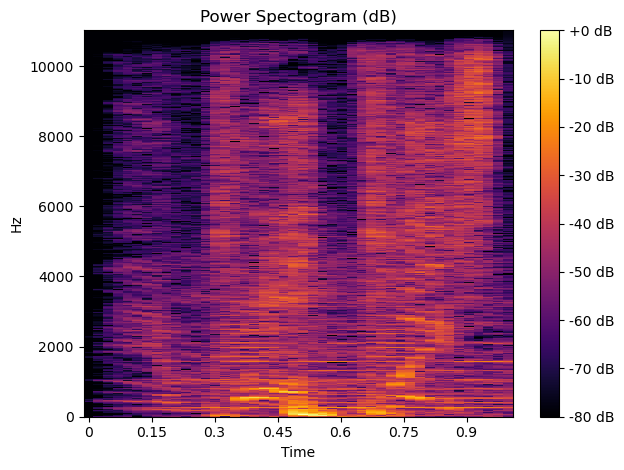

In [15]:
# Widmo mocy do sprawdzenia

# jeśli podniesiemy moduł stft z sygnału 
# do potęgi drugiej, otrzymamy 
# SPEKTOGRAM MOCY (power sepctogram)
ft = librosa.stft(sample1)
power_spec = np.abs(ft) ** 2

# zamiana na skalę dB (logarytmiczna skala mocy)
# S_db = 10 * log10(S/ref)
# S to moc, ref to wartość odniesienia, np.max(S) to największa moc w całym spektogramie
power_db = librosa.power_to_db(power_spec, ref=np.max)

librosa.display.specshow(power_db, sr=22050, x_axis='time', y_axis='hz', cmap='inferno')
plt.colorbar(format='%+2.0f dB')
plt.title('Power Spectogram (dB)')
plt.tight_layout()
plt.show()


czemu na wykresie wartości są ujemne?
Skala dB używana w spektogramie librosa to skala **względna**, w której wartości są wyrażane względem maksymalnej mocy w sygnale

In [17]:
print(f"""
    sample1.shape:      {sample1.shape}
    stft.shape:         {ft.shape}
    spec.shape:         {spec.shape}
    mel_spec.shape:     {mel_spect.shape}
    powerspect.shape:   {power_spec.shape}
      """)


    sample1.shape:      (22050,)
    stft.shape:         (1025, 44)
    spec.shape:         (1025, 87)
    mel_spec.shape:     (1025, 87)
    powerspect.shape:   (1025, 44)
      


# Cechy oparte o ludzkie postrzeganie cech audio
- MFCC (Mel Frequency Cepstral Coefficients) (Kefstralne współczynniki częstotliwości melowej)
- Chroma Features ()
- Tonnetz

# MFCC (Mel Frequency Cepstral Coefficients)
MFCC to zbiór liczb, które opisują kształt widma dźwięku, ale w taki sposób by odpowiadał ludzkiemu postrzeganiu słyszenia. 
- Używa skali melowej, która lepiej odwzorowuje to jak człowiek rozróżnia dźwięki o różnych częstotliwościach
- Redukuje dane z widma dźwięku do kilku współczynników (najczęściej 13-20), które zawierają najważniejsze informacje o barwie dźwięku

Jak działa MFCC?
1. Dzielenie sygnału na ramki (np. 25ms każda)
2. STFT / okno Fouriera - dla każdej ramki liczymy widmo częstotliwości
3. Mel-filterbank - przepuszczamy widmo przez zestaw filtrów melowych
4. Logarytm - bierzesz logarytm z mocy wyjściowej każdego filtru (czyli jak głośne są dane pasma)
5. DCT (Dyskretna Transformata Cosinusowa)


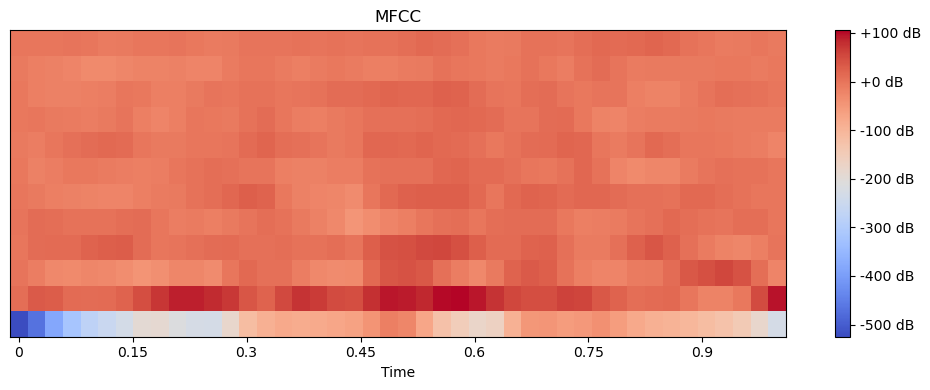

In [18]:
# Implementacja mfcc za pomocą librosa

mfcc = librosa.feature.mfcc(y=sample1, sr=22050, n_mfcc=12)

plt.figure(figsize=(10,4))
librosa.display.specshow(mfcc,x_axis='time',sr=22050)
plt.colorbar(format='%+2.0f dB')
plt.title("MFCC")
plt.tight_layout()
plt.show()

In [19]:
print(f"""
    sample1.shape:      {sample1.shape}
    stft.shape:         {ft.shape}
    spec.shape:         {spec.shape}
    mel_spec.shape:     {mel_spect.shape}
    powerspect.shape:   {power_spec.shape}
    mfcc.shape:         {mfcc.shape}
      """)


    sample1.shape:      (22050,)
    stft.shape:         (1025, 44)
    spec.shape:         (1025, 87)
    mel_spec.shape:     (1025, 87)
    powerspect.shape:   (1025, 44)
    mfcc.shape:         (12, 44)
      


# Chroma features (cechy chromatyczne)
to cechy audio, które reprezentują rozkład energii między 12 półtonami (klasami wysokości) w ramach jednej oktawy - niezależnie od tego w której oktawie faktycznie występują.

W muzyce jest 12 dźwięków podstawowtych w jednej oktawie

C, C#, D, D#, E, F, F#, G, G#, A, A#, B

Gdy gramy C3, C4, C2 - to różne dźwięki w różnych oktawach, ale wszystkie to *klasa wysokości C*.

**Chroma ignoruje oktawę** - mówi: ile energii znajduje się w każdej klasie wysokości, niezależnie od tego, w której oktawie.


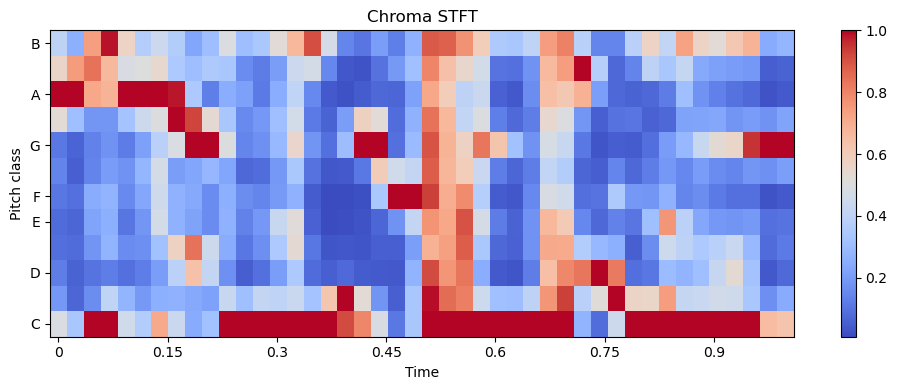

In [20]:
chroma_stft = librosa.feature.chroma_stft(y=sample1, sr=22050, n_fft=2048, hop_length=512, n_chroma=12)

plt.figure(figsize=(10, 4))
librosa.display.specshow(chroma_stft, x_axis='time', y_axis='chroma', cmap='coolwarm')
plt.colorbar()
plt.title('Chroma STFT')
plt.tight_layout()
plt.show()

In [21]:
print(f"""
    sample1.shape:      {sample1.shape}
    stft.shape:         {ft.shape}
    spec.shape:         {spec.shape}
    mel_spec.shape:     {mel_spect.shape}
    powerspect.shape:   {power_spec.shape}
    mfcc.shape:         {mfcc.shape}
    chroma_stft:        {chroma_stft.shape}
      """)


    sample1.shape:      (22050,)
    stft.shape:         (1025, 44)
    spec.shape:         (1025, 87)
    mel_spec.shape:     (1025, 87)
    powerspect.shape:   (1025, 44)
    mfcc.shape:         (12, 44)
    chroma_stft:        (12, 44)
      


# Chroma CQT
2. Chroma CQT

(Constant-Q Transform)

    Używa transformaty o stałym Q – rozdzielczość częstotliwościowa dopasowana do skali muzycznej (logarytmiczna).

    Każde „okno” częstotliwości jest dopasowane do konkretnego dźwięku muzycznego (np. A, A♯, B...).

    Lepsze odwzorowanie muzycznych wysokości dźwięku – szczególnie w niskim zakresie.

    Bardziej zgodne z percepcją ludzką i naturą dźwięków muzycznych.


    Bardziej kosztowne obliczeniowo niż STFT.

    Nieco bardziej skomplikowana implementacja.

/nix/store/17989vykv7pxc7yphx17k7zvcnzjzs35-python3.12-librosa-0.11.0/lib/python3.12/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=690
  warnings.warn(
/nix/store/17989vykv7pxc7yphx17k7zvcnzjzs35-python3.12-librosa-0.11.0/lib/python3.12/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=345
  warnings.warn(


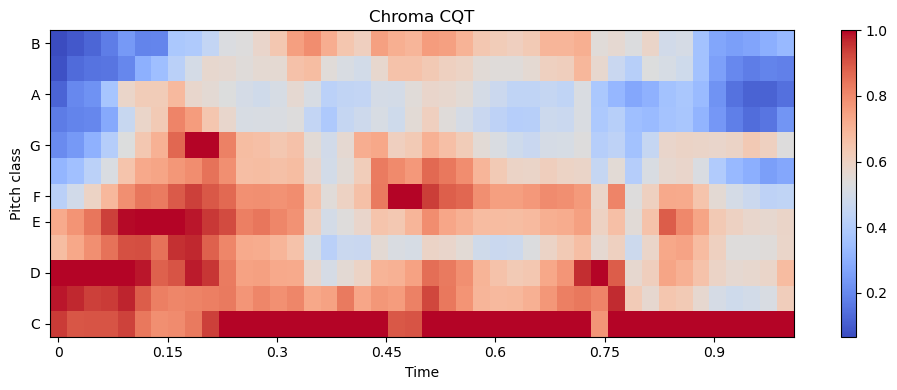

In [22]:
# chroma_cqt - na bazie CQT (lepsza harmonicznie)

chroma_cqt = librosa.feature.chroma_cqt(y=sample1, sr=22050)

plt.figure(figsize=(10, 4))
librosa.display.specshow(chroma_cqt, x_axis='time', y_axis='chroma', cmap='coolwarm')
plt.colorbar()
plt.title('Chroma CQT')
plt.tight_layout()
plt.show()

In [23]:
print(f"""
    sample1.shape:      {sample1.shape}
    stft.shape:         {ft.shape}
    spec.shape:         {spec.shape}
    mel_spec.shape:     {mel_spect.shape}
    powerspect.shape:   {power_spec.shape}
    mfcc.shape:         {mfcc.shape}
    chroma_stft:        {chroma_stft.shape}
    chroma_cqt:         {chroma_cqt.shape}
      """)


    sample1.shape:      (22050,)
    stft.shape:         (1025, 44)
    spec.shape:         (1025, 87)
    mel_spec.shape:     (1025, 87)
    powerspect.shape:   (1025, 44)
    mfcc.shape:         (12, 44)
    chroma_stft:        (12, 44)
    chroma_cqt:         (12, 44)
      


# Chroma CENS

🔹 3. Chroma CENS

(Chroma Energy Normalized Statistics)

    Wyliczane na bazie chroma STFT, ale dodatkowo:

        normalizowane (by usunąć wpływ głośności),

        czasowo uśredniane i zaokrąglane – zmniejsza wpływ drobnych zmian.

    Bardzo odporne na zakłócenia, zmiany instrumentów, tempo i dynamikę.

    Świetne do porównywania struktur harmonicznych (np. porównanie dwóch wersji tej samej piosenki).

    Mniej precyzyjne – mogą pomijać subtelne różnice harmoniczne.

    Nie nadają się do dokładnej rekonstrukcji.

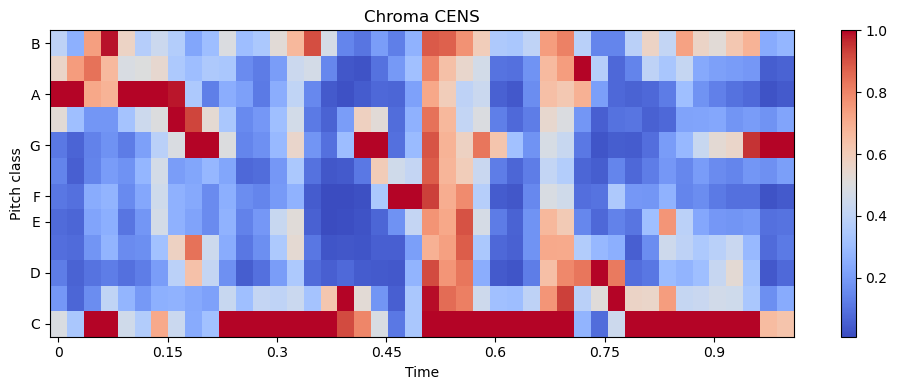

In [24]:
chroma_cens = librosa.feature.chroma_cens(y=sample1, sr=22050)

plt.figure(figsize=(10, 4))
librosa.display.specshow(chroma_stft, x_axis='time', y_axis='chroma', cmap='coolwarm')
plt.colorbar()
plt.title('Chroma CENS')
plt.tight_layout()
plt.show()

In [25]:
print(f"""
    sample1.shape:      {sample1.shape}
    stft.shape:         {ft.shape}
    spec.shape:         {spec.shape}
    mel_spec.shape:     {mel_spect.shape}
    powerspect.shape:   {power_spec.shape}
    mfcc.shape:         {mfcc.shape}
    chroma_stft:        {chroma_stft.shape}
    chroma_cqt:         {chroma_cqt.shape}
    chroma_cens:        {chroma_cens.shape}
      """)


    sample1.shape:      (22050,)
    stft.shape:         (1025, 44)
    spec.shape:         (1025, 87)
    mel_spec.shape:     (1025, 87)
    powerspect.shape:   (1025, 44)
    mfcc.shape:         (12, 44)
    chroma_stft:        (12, 44)
    chroma_cqt:         (12, 44)
    chroma_cens:        (12, 44)
      


# Tonnetz
Tonnetz [niem. Tonalnetz], sieć tonalna to sposób przedstawiania harmonii w muzyce - czyli jak różne dźwięki (klasy wysokości) są ze sobą powiązane tonalnie. 

librosa.feature.tonnetz() przekształca sygnał audio w 6 wymiarową reprezentację relacji harmonicznych.

Tonnetz skupia się na następujących interwałach muzycznych, w zależności czy są one w dół czy w górę:
- Kwinta czysta (perfect fifth) - 7 półtonów. 

dla G w górę to G->D, czyli 
G
G#
A
A#/Bmoll
B
C
C#
D

## Do czego używa się Tonnetz?

- Rozpoznawanie akordów, detekcja zmian harmonii
- Wykrywanie tonacji, na podstawie relacji między klasami dźwięków
- Analiza stylu muzycznego, harmonia typowa dla danego gatunku
- Wyszukiwanie podobnych utworów, na podstawie "harmonicznego śladu"

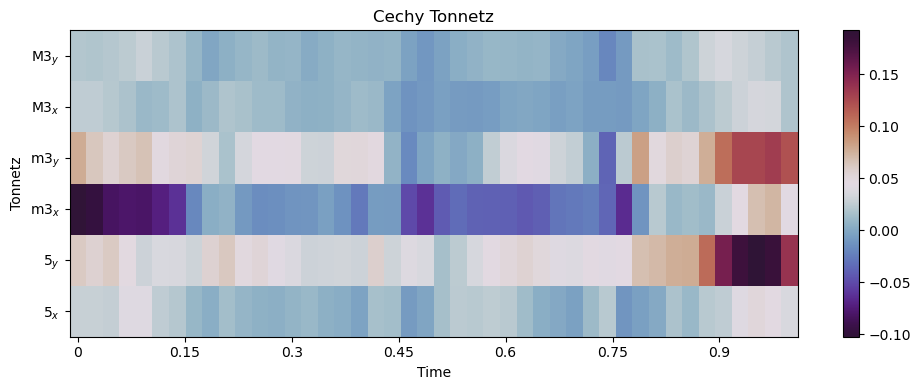

In [26]:
chroma = librosa.feature.chroma_cqt(y=sample1, sr=22050)
tonnetz = librosa.feature.tonnetz(chroma=chroma, sr=22050)
plt.figure(figsize=(10, 4))
librosa.display.specshow(tonnetz, y_axis='tonnetz', x_axis='time', cmap='twilight_shifted')
plt.colorbar()
plt.title('Cechy Tonnetz')
plt.tight_layout()
plt.show()


In [27]:

print(f"""
    sample1.shape:      {sample1.shape}
    stft.shape:         {ft.shape}
    spec.shape:         {spec.shape}
    mel_spec.shape:     {mel_spect.shape}
    powerspect.shape:   {power_spec.shape}
    mfcc.shape:         {mfcc.shape}
    chroma_stft:        {chroma_stft.shape}
    chroma_cqt:         {chroma_cqt.shape}
    tonnetz:            {tonnetz.shape}
      """)

# ANALIZA SKUPIEŃ Zamiast średnich 


    sample1.shape:      (22050,)
    stft.shape:         (1025, 44)
    spec.shape:         (1025, 87)
    mel_spec.shape:     (1025, 87)
    powerspect.shape:   (1025, 44)
    mfcc.shape:         (12, 44)
    chroma_stft:        (12, 44)
    chroma_cqt:         (12, 44)
    tonnetz:            (6, 44)
      
